# Exploratory Data Analysis On Titanic Dataset 

In [51]:
#Importing Important Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [52]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [53]:
#Finding total rows and columns in the dataset
train.shape

(891, 12)

In [54]:
#Checking NULL values in dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
#checking various aspects of numerical columns
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

<AxesSubplot:>

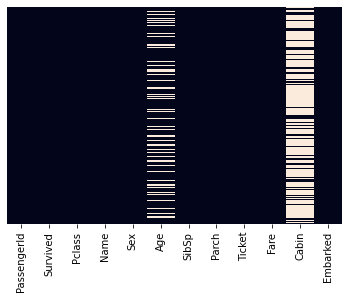

In [56]:
#Heatmap to visualize Null columns
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

#### We can see there is some Nan values in Age,Cabin and Embarked column

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

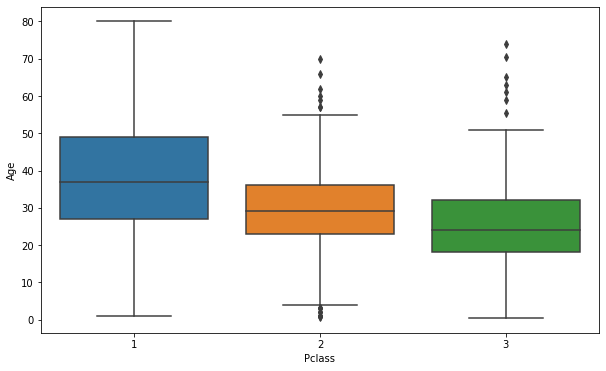

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train)

### Now we will use this average age values to impute Age based on Pclass

In [58]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
    
        elif Pclass==2:
            return 29
    
        else: 
            return 24
        
    else:   
            return Age

In [59]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [60]:
#Filling Embarked column with mean
train['Embarked'].fillna(train['Embarked'].mode(),inplace=True)

#### Lets drop our Name, Tickets and Cabin column that is NaN

In [61]:
train.drop(['Name','Ticket','Cabin'],axis = 1,inplace=True)

<AxesSubplot:>

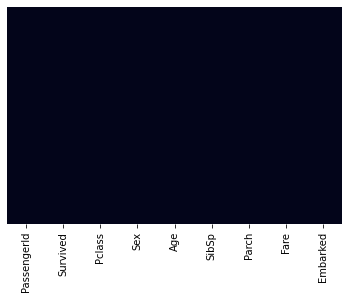

In [62]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

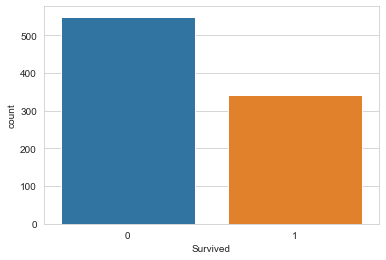

In [63]:
#Countplot
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

### We can see the death is more as compare to survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

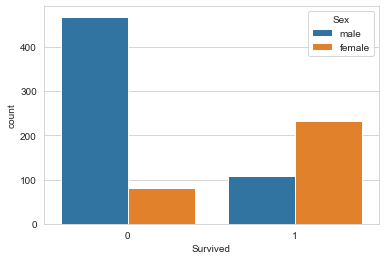

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

### Death of male passenger is high as compare female passenger

<AxesSubplot:xlabel='Survived', ylabel='count'>

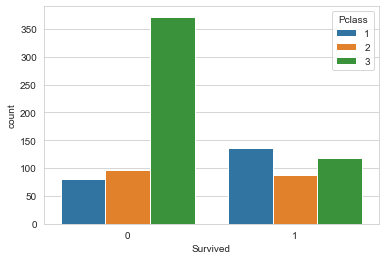

In [65]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

### Death rate is more in passenger class 3

<AxesSubplot:>

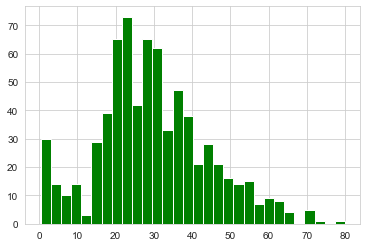

In [30]:
train['Age'].hist(bins=30,color='green')

### We can analyze here that death is more between the age of 20-30

<AxesSubplot:xlabel='SibSp', ylabel='count'>

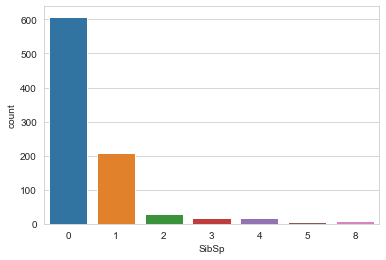

In [31]:
sns.countplot(x='SibSp',data=train)

### So here we can see that maximum people (ie around 600) have no Siblings/Spouses and around 200 have 1 spouse.

<AxesSubplot:>

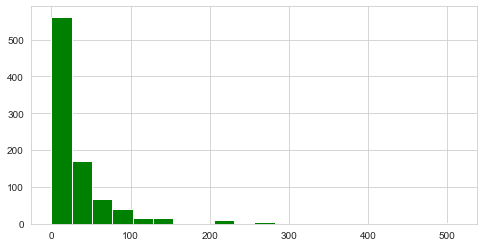

In [32]:
train['Fare'].hist(bins=20,color='green',figsize=(8,4))

<AxesSubplot:>

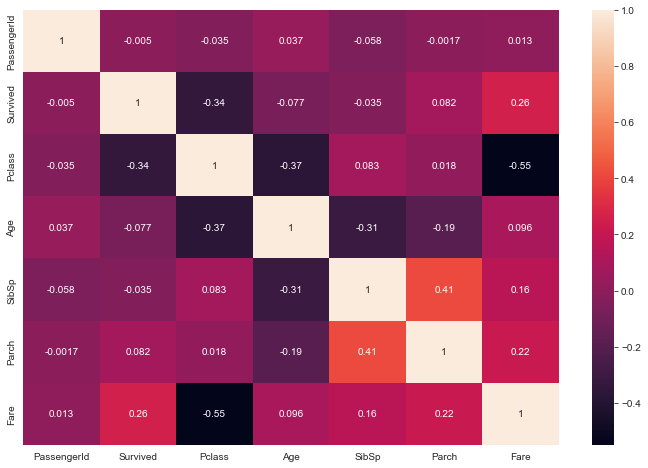

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)

### Maximum passenger in the ship have low price rate tickets.

In [67]:
train.Embarked = train.Embarked.replace({"S": 1, "C" : 2,"Q" : 3})
train['Sex'].replace(['female','male'],[0,1],inplace=True)

In [68]:
#Final dataset
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1.0
1,2,1,1,0,38.0,1,0,71.2833,2.0
2,3,1,3,0,26.0,0,0,7.9250,1.0
3,4,1,1,0,35.0,1,0,53.1000,1.0
4,5,0,3,1,35.0,0,0,8.0500,1.0
